# World Happiness Report Case

## Data Description

The World Happiness Report is a landmark survey of the state of global happiness.Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations.The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy(GDP per Capita),Family,Health(Life Expectancy),Freedom,Trust(Government Corruption),Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


checking the data dimension

In [3]:
df.shape

(158, 12)

we have 158 rows and 12 columns

In [4]:
df.dtypes

Country                          object
Region                           object
Happiness_Rank                    int64
Happiness_Score                 float64
Standard_Error                  float64
Economy(GDP per Capita)         float64
Family                          float64
Health(Life Expectancy)         float64
Freedom                         float64
Trust(Government Corruption)    float64
Generosity                      float64
Dystopia_Residual               float64
dtype: object

we have country and Region are in object dtype and remaining all columns in float dtype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       158 non-null    object 
 1   Region                        158 non-null    object 
 2   Happiness_Rank                158 non-null    int64  
 3   Happiness_Score               158 non-null    float64
 4   Standard_Error                158 non-null    float64
 5   Economy(GDP per Capita)       158 non-null    float64
 6   Family                        158 non-null    float64
 7   Health(Life Expectancy)       158 non-null    float64
 8   Freedom                       158 non-null    float64
 9   Trust(Government Corruption)  158 non-null    float64
 10  Generosity                    158 non-null    float64
 11  Dystopia_Residual             158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [6]:
df.isnull().sum()

Country                         0
Region                          0
Happiness_Rank                  0
Happiness_Score                 0
Standard_Error                  0
Economy(GDP per Capita)         0
Family                          0
Health(Life Expectancy)         0
Freedom                         0
Trust(Government Corruption)    0
Generosity                      0
Dystopia_Residual               0
dtype: int64

There are no null values in the data set

## Summary Statistics 

In [7]:
df.describe()

,Happiness_Rank,Happiness_Score,Standard_Error,Economy(GDP per Capita),Family,Health(Life Expectancy),Freedom,Trust(Government Corruption),Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


observation
The mean is more tha median(50th percentile), it means outliers are present in the given data set

### Data Visualization

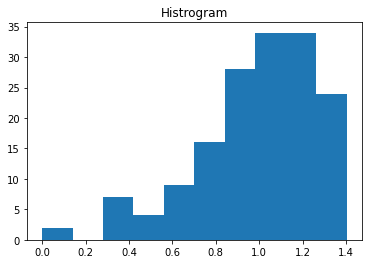

In [8]:
plt.hist(df['Family'])
plt.title("Histrogram")
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x24850f0abe0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x24850f0aa30>,
 'cmins': <matplotlib.collections.LineCollection at 0x24850f1d0d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x24850f1d3d0>}

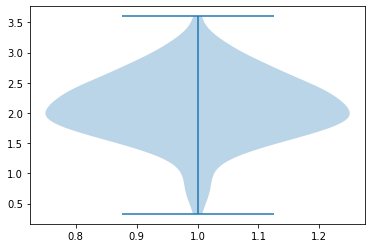

In [9]:
plt.violinplot(df['Dystopia_Residual'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


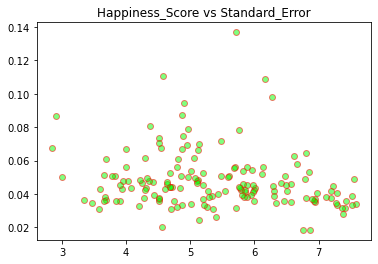

In [10]:
plt.scatter(df["Happiness_Score"],df["Standard_Error"],alpha=0.5,c=(0,1,0),edgecolor='r')
plt.title("Happiness_Score vs Standard_Error")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


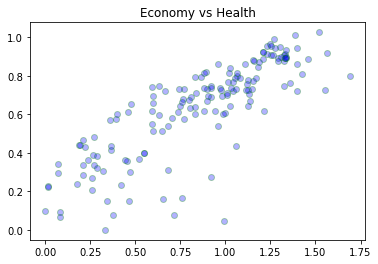

In [11]:
plt.scatter(df["Economy(GDP per Capita)"],df["Health(Life Expectancy)"],alpha=0.3,c=(0,0,1),edgecolor='g')
plt.title("Economy vs Health")
plt.show()

<AxesSubplot:>

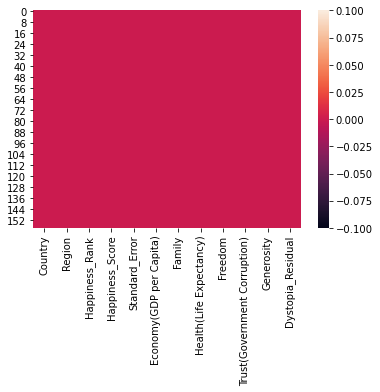

In [12]:
sns.heatmap(df.isnull())

if we have null values then we can see the different shade in plot 

### To check correlation

In [13]:
dfcorr=df.corr()
dfcorr

,Happiness_Rank,Happiness_Score,Standard_Error,Economy(GDP per Capita),Family,Health(Life Expectancy),Freedom,Trust(Government Corruption),Generosity,Dystopia_Residual
Happiness_Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness_Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard_Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy(GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health(Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust(Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia_Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

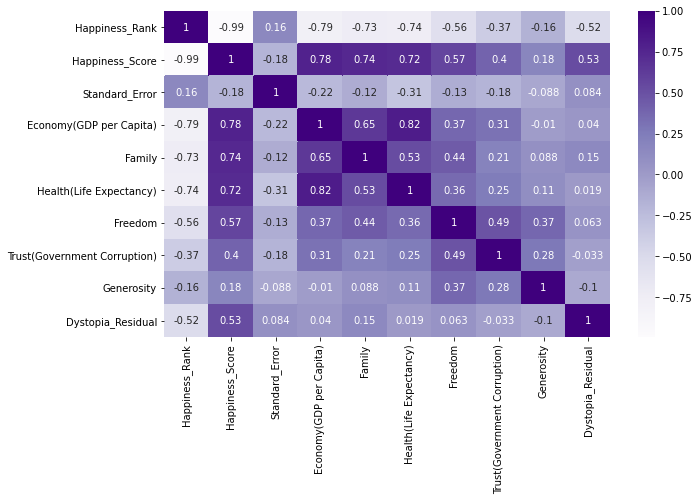

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcorr,cmap='Purples',annot=True)

dark shade indicates highly correlated 

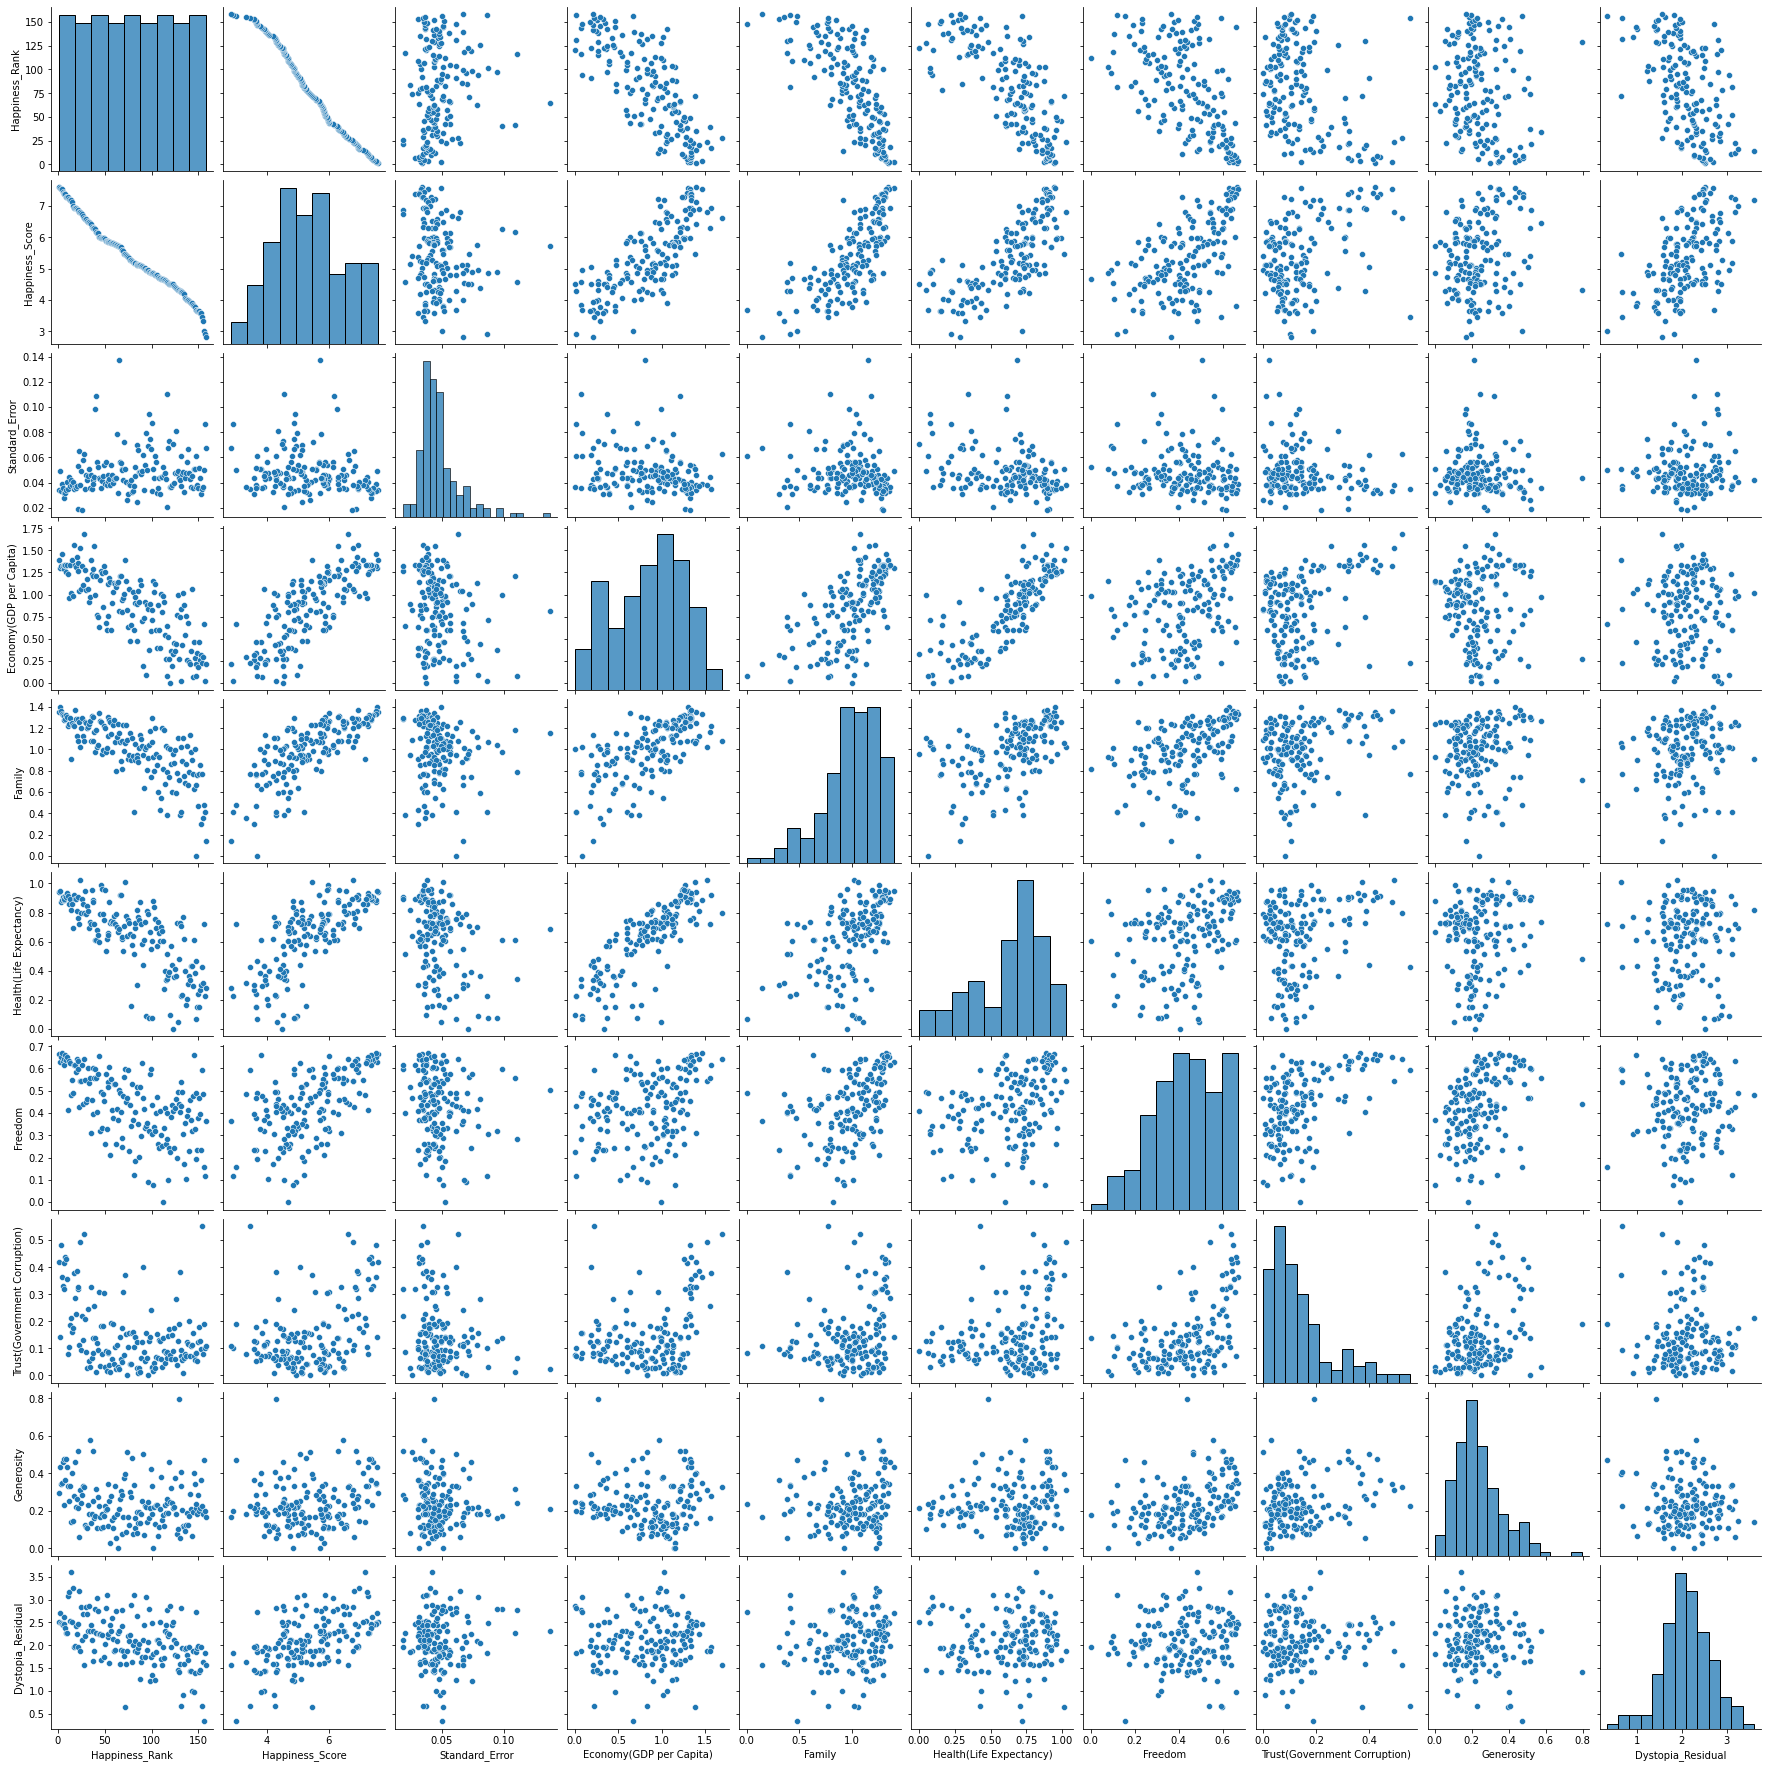

In [15]:
sns.pairplot(df)

#### Droping the columns

drop the columns which is not effected the data while doing the further process

here we have 3 columns to drop
1.country
2.region
3.happiness rank which is like a serial number.

In [16]:
df1=df.drop(columns=["Country","Region","Happiness_Rank"],axis=1)

In [17]:
df1.head()

,Happiness_Score,Standard_Error,Economy(GDP per Capita),Family,Health(Life Expectancy),Freedom,Trust(Government Corruption),Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


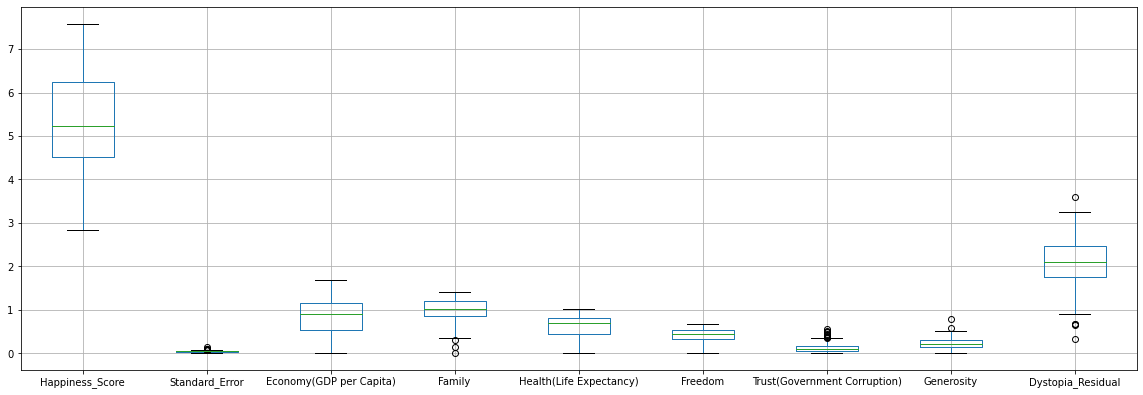

In [18]:
df1.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

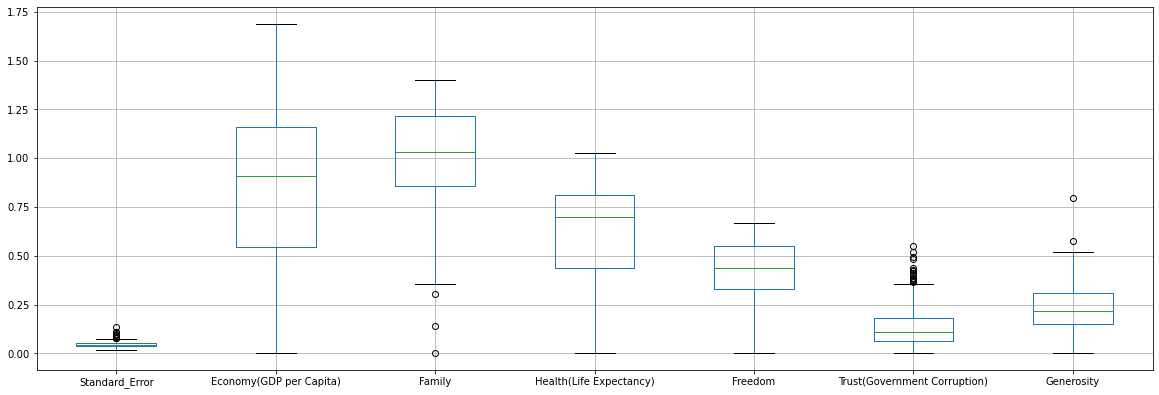

In [19]:
df1[['Standard_Error','Economy(GDP per Capita)','Family','Health(Life Expectancy)','Freedom','Trust(Government Corruption)','Generosity']].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

we can see the outliers in the data, almost all the outlier are near to the whisker 

#### Removing Skewnees in dataset

In [20]:
df1.skew()

Happiness_Score                 0.097769
Standard_Error                  1.983439
Economy(GDP per Capita)        -0.317575
Family                         -1.006893
Health(Life Expectancy)        -0.705328
Freedom                        -0.413462
Trust(Government Corruption)    1.385463
Generosity                      1.001961
Dystopia_Residual              -0.238911
dtype: float64

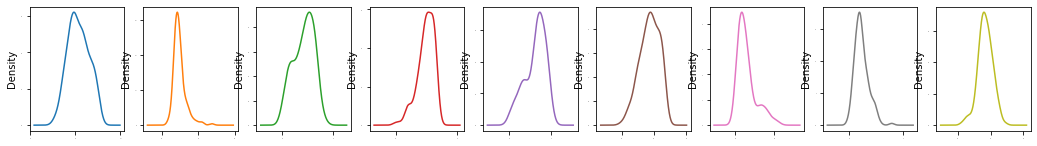

In [21]:
df1.plot(kind='density',subplots=True, layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(22,16))
plt.show()

In [22]:
#droping Happiness_score column, no need to do power_transform to target variable
df1=df1.drop('Happiness_Score',axis=1)

In [23]:
from sklearn.preprocessing import power_transform
df_new=pd.DataFrame(power_transform(df1),columns=df1.columns)


In [24]:
df_new.skew()

Standard_Error                 -0.020092
Economy(GDP per Capita)        -0.127233
Family                         -0.169651
Health(Life Expectancy)        -0.183181
Freedom                        -0.080728
Trust(Government Corruption)    0.185965
Generosity                      0.013320
Dystopia_Residual               0.022925
dtype: float64

In [25]:
from sklearn.preprocessing import power_transform
df3=pd.DataFrame(power_transform(df_new),columns=df_new.columns)
df3.skew()

Standard_Error                 -0.076504
Economy(GDP per Capita)         0.008784
Family                         -0.033913
Health(Life Expectancy)         0.001072
Freedom                        -0.026221
Trust(Government Corruption)    0.007235
Generosity                     -0.019101
Dystopia_Residual              -0.033397
dtype: float64

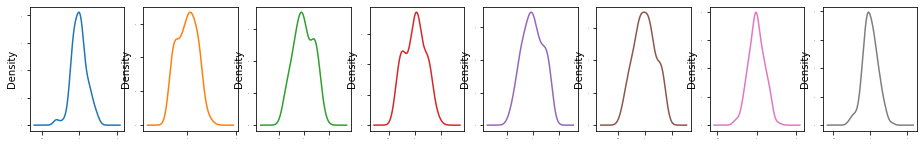

In [26]:
df3.plot(kind='density',subplots=True, layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(22,16))
plt.show()

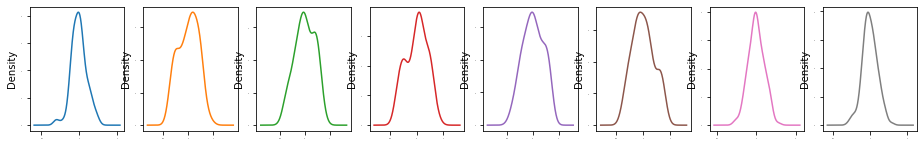

In [27]:
df_new.plot(kind='density',subplots=True, layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(22,16))
plt.show()

In [28]:
def sqrt(data_frame,feature_name):
    data_frame_copy=data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name]=np.sqrt(data_frame_copy[feature_name])
    print(data_frame[feature_name].skew())
    data_frame[feature_name].plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(22,16))
    plt.show()

In [29]:
def log_transform(data_frame,feature_name):
    data_frame_copy=data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name]=np.log(data_frame_copy[feature_name])
    print(data_frame[feature_name].skew())
    data_frame[feature_name].plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(22,16))
    plt.show()

In [30]:
def exponential(data_frame,feature_name):
    data_frame_copy=data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name]=np.exp(data_frame_copy[feature_name])
    print(data_frame[feature_name].skew())
    data_frame[feature_name].plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(22,16))
    plt.show()

-0.07650392620490067


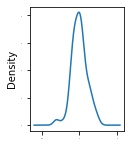

In [31]:
sqrt(df3,'Standard_Error')

0.008783758358595222


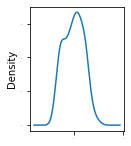

In [32]:
exponential(df3,'Economy(GDP per Capita)')

-0.03391336867370234


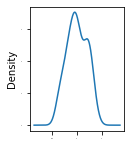

In [33]:
exponential(df3,'Family') 

because of values are near to 0 their is no changes after applying the transformation

0.0010715269030520309


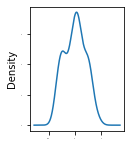

In [34]:
log_transform(df3,'Health(Life Expectancy)')        

-0.02622060050838855


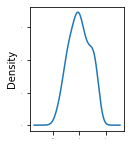

In [35]:
exponential(df3,'Freedom')                   

obsevation

after doing power transformation also we have some skewness in data, to clear that need to use log transformation, sqrt transformation, and exponential.
if we use directly values which is negative and near to zero values will trun nan values so wrote a if condition to those values to not change as nan values.


### Spliting features and target variable

The project is about the world happiness so here our target variable is Happiness_Score, and left columns are the feature that are independent variable which showing impact on target variable by increasing and decreasing scores individually

In [36]:
x=df3
y=df["Happiness_Score"]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=40,random_state=25)

In [38]:
x_train.shape

(118, 8)

In [39]:
x_test.shape

(40, 8)

In [40]:
y_train.shape

(118,)

In [41]:
y_test.shape

(40,)

### Apply LinearRegression

In [42]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)

In [43]:
lm.score(x_train,y_train)

0.9882895299016756

In [44]:
lm.coef_

array([1.09338472e-04, 4.05628494e-01, 2.82407161e-01, 2.50042632e-01,
       1.47904926e-01, 6.55716011e-02, 9.55825356e-02, 5.21902778e-01])

In [45]:
#predict the validation data
pred=lm.predict(x_test)
print("predicted result price:",pred)
print("actual price",y_test)

predicted result price: [6.7480673  4.89640081 4.98126481 5.22943365 5.06109906 4.66468359
 6.61929123 6.44316287 4.86771121 6.09928265 4.4681278  5.09835196
 4.66891795 4.60070512 5.75675659 4.39246377 5.86622392 4.89117533
 4.55223255 5.99000575 4.02076107 5.05815665 5.07525311 4.2789793
 6.00589734 4.50577491 5.23365747 6.53180478 7.35007552 5.01479013
 3.70934665 6.2849982  3.75227787 6.09634045 6.82269949 5.34155706
 6.72763968 4.87353354 5.98462492 5.77222682]
actual price 21     6.853
99     4.874
96     4.898
77     5.268
79     5.212
105    4.786
26     6.670
31     6.485
101    4.857
40     6.168
127    4.332
82     5.192
110    4.681
115    4.571
65     5.695
120    4.514
52     5.878
97     4.885
113    4.633
41     6.130
135    4.077
78     5.253
81     5.192
125    4.369
54     5.848
121    4.512
75     5.332
30     6.505
6      7.378
85     5.124
150    3.655
34     6.411
148    3.667
49     5.948
20     6.867
70     5.477
28     6.575
95     4.949
42     6.123
58     5.

In [46]:
from math import sqrt

In [47]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error",mean_absolute_error(y_test,pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,pred)))

error:
mean_squared_error: 0.009223466172365644
mean_absolute_error 0.08180360063618863
sqrt_mean_squared_error 0.09603887844183544


In [48]:
print("r2_score",r2_score(y_test,pred))

r2_score 0.9886495502921311


### Apply Lasso

In [49]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9882874314987424

In [50]:
#prediction on validation data
pred1=ls.predict(x_test)

In [51]:
ls.coef_

array([-0.        ,  0.4052624 ,  0.2823341 ,  0.2496253 ,  0.14805328,
        0.06495479,  0.09470615,  0.52098549])

In [52]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,pred1))
print("mean_absolute_error",mean_absolute_error(y_test,pred1))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,pred1)))

error:
mean_squared_error: 0.009266966293792863
mean_absolute_error 0.08221459730553407
sqrt_mean_squared_error 0.0962650834612055


In [53]:
print("r2_score",r2_score(y_test,pred1))

r2_score 0.9885960187963443


### Apply Randomized Searchcv on Lasso model.

In [54]:
parameters = {"alpha":[0.00001,0.0001,0.001,0.01,0.1,1]}
rdm_lasso = RandomizedSearchCV(ls,param_distributions=parameters,n_iter=10,n_jobs=-1,cv=5,verbose=2)

rdm_lasso.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.3s finished


RandomizedSearchCV(cv=5, estimator=Lasso(alpha=0.001), n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1]},
                   verbose=2)

In [55]:
rdm_lasso_pred= rdm_lasso.predict(x_test)

In [56]:
rdm_lasso.best_estimator_

Lasso(alpha=0.01)

In [57]:
rdm_lasso.best_score_

0.9850853851774664

In [58]:
print("r2_score",r2_score(y_test,rdm_lasso_pred))

r2_score 0.9878822109393517


In [59]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rdm_lasso_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rdm_lasso_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rdm_lasso_pred)))

error:
mean_squared_error: 0.009847012264832741
mean_absolute_error 0.08646516996122158
sqrt_mean_squared_error 0.09923211307249655


### Apply Ridge Regression

In [60]:
rg=Ridge()
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.9882679978400803

In [61]:
#prediction on validation data
rg_pred=ls.predict(x_test)

In [62]:
rg.coef_

array([-2.85035338e-04,  3.99255494e-01,  2.83547617e-01,  2.52809972e-01,
        1.48472357e-01,  6.61965028e-02,  9.35785102e-02,  5.17752930e-01])

In [63]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rg_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rg_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rg_pred)))

error:
mean_squared_error: 0.009266966293792863
mean_absolute_error 0.08221459730553407
sqrt_mean_squared_error 0.0962650834612055


In [64]:
print("r2_score",r2_score(y_test,rg_pred))

r2_score 0.9885960187963443


### Apply Randomized Searchcv on Ridge model.

In [65]:
parameters = {"alpha":[1,2,5,10,15,20]}

rd_ridge=RandomizedSearchCV(rg,param_distributions=parameters,n_iter=15,n_jobs=-1,cv=5,verbose=2)

rd_ridge.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=15, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 5, 10, 15, 20]},
                   verbose=2)

In [66]:
rd_ridge.best_estimator_

Ridge(alpha=1)

In [67]:
rd_ridge.best_score_

0.9847703561496435

In [68]:
# prediction on validation data
rd_ridge_pred= rd_ridge.predict(x_test)

In [69]:
print("r2_score",r2_score(y_test,rd_ridge_pred))
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rd_ridge_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rd_ridge_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rd_ridge_pred)))

r2_score 0.9884044817716591
error:
mean_squared_error: 0.00942261081127092
mean_absolute_error 0.08313767833815308
sqrt_mean_squared_error 0.09707013346684407


### Apply Gradient Boosting Regressor

In [70]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

0.999110994431396

In [71]:
# prediction on validation data
gbr_pred= gbr.predict(x_test)

r2_score(y_test,gbr_pred)

0.913671901295912

In [72]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,gbr_pred))
print("mean_absolute_error",mean_absolute_error(y_test,gbr_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,gbr_pred)))

error:
mean_squared_error: 0.07015090314613599
mean_absolute_error 0.2241282183135093
sqrt_mean_squared_error 0.2648601577174944


In [73]:
#Apply Randomized Searchcv on GB model.

parameters = {"n_estimators":[50,100,200,300,400,500,600,700,800,900],"learning_rate":[0.01,0.05,0.1,0.3,0.5,0.6,0.7]
              ,"max_depth":[3,4,5,6,7,8,9,10,12,15],"min_samples_split":[2,5,8,10,12,15,18,20,22],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7,8]}

rdm_gb = RandomizedSearchCV(gbr,param_distributions=parameters,n_iter=80,n_jobs=-1,cv=10,verbose=2)

rdm_gb.fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.1min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5, 0.6, 0.7],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      12, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7, 8],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              15, 18, 20, 22],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
                   verbose=2)

In [74]:
rdm_gb.best_estimator_

GradientBoostingRegressor(max_features='sqrt', min_samples_leaf=8,
                          min_samples_split=15, n_estimators=700)

In [75]:
rdm_gb.best_score_

0.9406901444765193

In [76]:
#Prediction Validation Data

rdm_gb_pred= rdm_gb.predict(x_test)

In [77]:
r2_score(y_test,rdm_gb_pred)

0.9485686341972761

In [78]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rdm_gb_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rdm_gb_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rdm_gb_pred)))

error:
mean_squared_error: 0.04179353901291845
mean_absolute_error 0.16878203081889342
sqrt_mean_squared_error 0.2044346815315798


### Apply Decision Tree Regressor

In [79]:
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

1.0

In [80]:
#Prediction on validation data
dt_pred= dt.predict(x_test)
r2_score(y_test,dt_pred)

0.5079001157162351

In [81]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,dt_pred))
print("mean_absolute_error",mean_absolute_error(y_test,dt_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,dt_pred)))

error:
mean_squared_error: 0.3998842999999998
mean_absolute_error 0.47775
sqrt_mean_squared_error 0.6323640565370551


In [82]:
#Apply Randomized Searchcv on DecisionTree model.

parameters = {"criterion":["mse","mae"],"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18,25],
             "max_features":['auto','sqrt',"log2"],"min_samples_leaf":[1,3,5,6,7]}

rdm_dt = RandomizedSearchCV(dt,param_distributions=parameters,n_iter=40,n_jobs=-1,cv=10,verbose=2)

rdm_dt.fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.7s finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18, 25]},
                   verbose=2)

In [83]:
rdm_dt.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_split=5)

In [84]:
rdm_dt.best_score_

0.742128694030305

In [85]:
#Prediction Validation Data

rdm_dt_pred = rdm_dt.predict(x_test)

r2_score(y_test,rdm_dt_pred)

0.6680072858930248

In [86]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rdm_dt_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rdm_dt_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rdm_dt_pred)))

error:
mean_squared_error: 0.2697799335575819
mean_absolute_error 0.4295203354978355
sqrt_mean_squared_error 0.5194034400709933


### Apply RandomForest Regressor

In [87]:
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9859116032747733

In [88]:
#Prediction on validation dataset
rf_pred = rf.predict(x_test)

In [89]:
r2_score(y_test,rf_pred)

0.9386928362785589

In [90]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rf_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rf_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rf_pred)))

error:
mean_squared_error: 0.049818691352500014
mean_absolute_error 0.17513624999999994
sqrt_mean_squared_error 0.22320101109201995


In [91]:
#Apply Randomized Searchcv on Random Forest model.

parameters = {"n_estimators":[100,200,300,400,500,600,700,800],"criterion":["mse","mae"]
              ,"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7]}

rdm_rf= RandomizedSearchCV(rf,param_distributions=parameters,n_iter=30,n_jobs=-1,cv=8,verbose=2)

rdm_rf.fit(x_train,y_train)

Fitting 8 folds for each of 30 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   57.4s finished


RandomizedSearchCV(cv=8, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   verbose=2)

In [92]:
rdm_rf.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_split=10)

In [93]:
rdm_rf.best_score_

0.8609832694088342

In [94]:
#Prediction Validation Data

rdm_rf_pred = rdm_rf.predict(x_test)

In [95]:
r2_score(y_test,rdm_rf_pred)

0.9276600701969319

In [96]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,rdm_rf_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rdm_rf_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rdm_rf_pred)))

error:
mean_squared_error: 0.05878400527049947
mean_absolute_error 0.18583907801539007
sqrt_mean_squared_error 0.2424541302401332


### Apply KNN Regressor

In [97]:
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.9309534781120152

In [98]:
#do Prediction on Test Dataset.
knn_pred= knn.predict(x_test)

In [99]:
r2_score(y_test,rf_pred)

0.9386928362785589

In [100]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,knn_pred))
print("mean_absolute_error",mean_absolute_error(y_test,knn_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,knn_pred)))

error:
mean_squared_error: 0.08060244899999999
mean_absolute_error 0.22703499999999996
sqrt_mean_squared_error 0.2839057044160966


In [101]:
rmse_val = []

for i in range(1,31):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

Text(0, 0.5, 'RMSE')

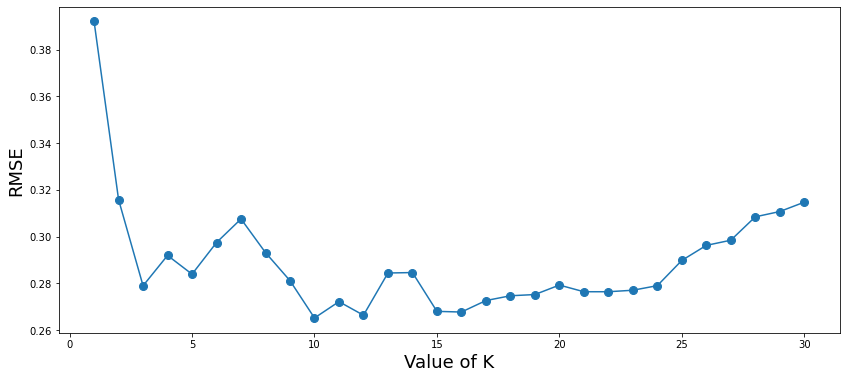

In [102]:
plt.figure(figsize=(14,6))
plt.plot(range(1,31),rmse_val,marker="o",markersize=8)
plt.xlabel("Value of K",fontsize=18)
plt.ylabel("RMSE",fontsize=18)

at n=8 rmse is very less so try n_neighbors=8

In [103]:
knn_model  = KNeighborsRegressor(n_neighbors=8)
knn_model.fit(x_train,y_train)
knn_model.score(x_train,y_train)

0.9342750505163093

In [104]:
#do Prediction on Test Dataset
knn_pred1= knn_model.predict(x_test)

In [105]:
r2_score(y_test,knn_pred)

0.9008101697768878

In [106]:
print("error:")
print("mean_squared_error:",mean_squared_error(y_test,knn_pred1))
print("mean_absolute_error",mean_absolute_error(y_test,knn_pred1))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,knn_pred1)))

error:
mean_squared_error: 0.08592660820312506
mean_absolute_error 0.23454687500000002
sqrt_mean_squared_error 0.293132407289138


### Conclusion

after using different M/L algorithm it's clear that linearRegression giving the best accuracy so use it to predict the test data

### Saving the model

In [107]:
import joblib
joblib.dump(lm,"World_Happiness_project.pkl")

['World_Happiness_project.pkl']

### Loading the saved model

In [108]:
model=joblib.load("World_Happiness_project.pkl")

In [109]:
prediction=model.predict(x_test)

In [110]:
print(r2_score(y_test,prediction)*100)

98.8649550292131
